## Monte Carlo Simulation

### Following mathematical models and problems will be tested to see the Expected Return
- Monty Hall problem
- Roulette
- cash and carry arbitrage
- BlackJack

- plot normal distribution to see whether the results follow it and hence provide confidence interval and standard deviation.

In [101]:
import random, pylab
import matplotlib.pyplot as plt

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

random.seed(0)
game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 20, 1, True)

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
        
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')
             
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std


100 spins of Fair Roulette
Expected return betting 20 = 8.0%

100 spins of Fair Roulette
Expected return betting 20 = 8.0%

100 spins of Fair Roulette
Expected return betting 20 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 20 = -0.2764%

1000000 spins of Fair Roulette
Expected return betting 20 = 0.3968%

1000000 spins of Fair Roulette
Expected return betting 20 = -0.4348%


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%
Exp. return for European Roulette = -2.26%
Exp. return for American Roulette = -8.92%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%
Exp. return for European Roulette = -4.168%
Exp. return for American Roulette = -5.752%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8144%
Exp. return for European Roulette = -2.6506%
Exp. return for American Roulette = -5.113%

Simulate 20 trials of 1000000 spins each
Exp. return for Fair Roulette = -0.0723%
Exp. return for Eur

In [120]:
# Monty Hall problem
# Simulating such scenarios: 3 doors and Monty opens one for you that you did not choose, 100 doors and monty opens all doors except for your chosen one and another door, 1000 doors, 10000 doors, 1000000 doors.

# Logical understanding:
# Vos Savant's response was that the contestant should switch to the other door.[3] Under the standard assumptions, the switching strategy has a 2/3 probability of winning the car, while the strategy that remains with the initial choice has only a 1/3 probability.

# The idea is that odds of picking a car is 1/3 for any door, hence if you pick any door then odds of the car being behind the other 2 doors is 2/3, therefore when the host reveals one of the unpicked doors, the probability of 2/3 goes to the other unopened door that you did not select, therefore you should switch as it increases your chance of winning.

class MontyHallGame:
    def __init__(self):
        # the door behind which a car is, is constant
        self.carDoor = 2
    
    def pickADoor(self, numDoors):
        yourDoorPick = random.randint(1, numDoors)
        
        return yourDoorPick

    def runGame(self, numDoors, switchYes):
        selectDoor = self.pickADoor(numDoors)
        
        if switchYes:
            if selectDoor == self.carDoor:
                availableDoors = [door for door in range(1, numDoors + 1) if door not in (selectDoor, self.carDoor)]
                selectDoor = random.choice(availableDoors)
            else:
                selectDoor = self.carDoor
        
        # returns True if they match, otherwise False
        return selectDoor == self.carDoor
    
    def __str__(self):
        return "Monty Hall Simulation"

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std
    
numberOfTrials = 5
numberOfRuns = 10000
numberOfDoors = [3, 7, 10, 100, 1000, 10000]

def runTrials(game, numTrials, numRuns, numDoors, switchYesOrNo):
    winReturns = []
    
    for i in range(numTrials):
        numOfWins = 0
        for j in range(numRuns):
            if game.runGame(numDoors, switchYesOrNo):
                numOfWins += 1
        winReturns.append(round(numOfWins/numRuns, 4))
    
    return winReturns
        

def runMontyHall(montyGame, numberOfTrials, numberOfRuns, numberOfDoors):
        for door in numberOfDoors:
            winProbsWithSwitch = runTrials(montyGame, numberOfTrials, numberOfRuns, door, True)
            winProbsNoSwitch = runTrials(montyGame, numberOfTrials, numberOfRuns, door, False)
            
            # mean and standard deviation of the results
            meanWithSwitch, stdWithSwitch = getMeanAndStd(winProbsWithSwitch)
            meanNoSwitch, stdNoSwitch = getMeanAndStd(winProbsNoSwitch)
            
            print('\nSimulate Monty Hall Problem with', str(door) + " doors,", numberOfTrials, 'trials of', numberOfRuns, "spins each:")
            
            print('Probability of Winning with Switch', '=', str(round(meanWithSwitch * 100, 4)) + "%", "standard deviation", str(round(stdWithSwitch/meanWithSwitch * 100, 4)) + "%")
            print("Probability of Winning without Switch", '=', str(round(meanNoSwitch * 100, 4)) +  "%", "standard deviation", str(round(stdNoSwitch/meanNoSwitch * 100, 4)) + "%")

montyGame = MontyHallGame()
runMontyHall(montyGame, numberOfTrials, numberOfRuns, numberOfDoors)
    


Simulate Monty Hall Problem with 3 doors, 5 trials of 10000 spins each:
Probability of Winning with Switch = 66.976% standard deviation 0.54%
Probability of Winning without Switch = 33.316% standard deviation 1.2915%

Simulate Monty Hall Problem with 7 doors, 5 trials of 10000 spins each:
Probability of Winning with Switch = 85.532% standard deviation 0.2108%
Probability of Winning without Switch = 14.388% standard deviation 1.6302%

Simulate Monty Hall Problem with 10 doors, 5 trials of 10000 spins each:
Probability of Winning with Switch = 89.882% standard deviation 0.282%
Probability of Winning without Switch = 9.884% standard deviation 3.6482%

Simulate Monty Hall Problem with 100 doors, 5 trials of 10000 spins each:
Probability of Winning with Switch = 99.01% standard deviation 0.0679%
Probability of Winning without Switch = 0.93% standard deviation 7.8133%

Simulate Monty Hall Problem with 1000 doors, 5 trials of 10000 spins each:
Probability of Winning with Switch = 99.886% sta

## Bollinger Band strategy
### Backtesting on real stock price data

In [200]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import pyfolio as pf

import os
import warnings

# Ignore printing all warnings
warnings.filterwarnings('ignore')

In [154]:
start = datetime(2010, 1, 1).date()
end = datetime.now().date()

In [178]:
stock_df = web.DataReader("AAPL", "yahoo", start, end)

In [179]:
stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096
...,...,...,...,...,...,...
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005
2022-06-13,135.199997,131.440002,132.869995,131.880005,122207100.0,131.880005
2022-06-14,133.889999,131.479996,133.130005,132.759995,84784300.0,132.759995


In [183]:
# Here are the steps to create your own back-testing code.

# Import necessary libraries
# Download OHLCV Data
# Calculate daily returns
# Create strategy-based data columns
# Create strategy indicators
# Create signals and positions
# Analyze results

In [186]:
# Performance of a buy and hold strategy:
stock_df['bnh_returns'] = np.log(stock_df['Adj Close']/stock_df['Adj Close'].shift(1))

In [187]:
stock_df

,High,Low,Open,Close,Volume,Adj Close,bnh_returns
Date,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383,0.001727
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255,-0.016034
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345,-0.001850
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096,0.006626
...,...,...,...,...,...,...,...
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005,-0.039395
2022-06-13,135.199997,131.440002,132.869995,131.880005,122207100.0,131.880005,-0.039037
2022-06-14,133.889999,131.479996,133.130005,132.759995,84784300.0,132.759995,0.006650


In [189]:
# Creating a bollinger band strategy
stock_df['ma20'] = stock_df["Adj Close"].rolling(window=20).mean()
stock_df['std'] = stock_df["Adj Close"].rolling(window=20).std()
stock_df['upper_band'] = stock_df['ma20'] + (2 * stock_df["std"])
stock_df['lower_band'] = stock_df['ma20'] - (2 * stock_df['std'])
stock_df.drop(["Open", "High", "Low"], axis=1, inplace=True, errors='ignore')
stock_df.tail(5)

,Close,Volume,Adj Close,bnh_returns,ma20,std,upper_band,lower_band
Date,,,,,,,,
2022-06-10,137.130005,91437900.0,137.130005,-0.039395,144.589002,4.454365,153.497733,135.680272
2022-06-13,131.880005,122207100.0,131.880005,-0.039037,143.827502,5.234257,154.296017,133.358987
2022-06-14,132.759995,84784300.0,132.759995,0.006650,143.188503,5.767159,154.722820,131.654185
2022-06-15,135.429993,91533000.0,135.429993,0.019912,142.498002,5.830863,154.159727,130.836277
2022-06-16,130.059998,108123900.0,130.059998,-0.040459,141.960001,6.456656,154.873313,129.046690


In [191]:
stock_df.head(25)

,Close,Volume,Adj Close,bnh_returns,ma20,std,upper_band,lower_band
Date,,,,,,,,
2010-01-04,7.643214,4.937296e+08,6.535085,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,6.019048e+08,6.546383,0.001727,NaN,NaN,NaN,NaN
2010-01-06,7.534643,5.521600e+08,6.442255,-0.016034,NaN,NaN,NaN,NaN
2010-01-07,7.520714,4.771312e+08,6.430345,-0.001850,NaN,NaN,NaN,NaN
2010-01-08,7.570714,4.476108e+08,6.473096,0.006626,NaN,NaN,NaN,NaN
2010-01-11,7.503929,4.622296e+08,6.415993,-0.008861,NaN,NaN,NaN,NaN
2010-01-12,7.418571,5.944596e+08,6.343011,-0.011440,NaN,NaN,NaN,NaN
2010-01-13,7.523214,6.058920e+08,6.432483,0.014007,NaN,NaN,NaN,NaN
2010-01-14,7.479643,4.328940e+08,6.395230,-0.005808,NaN,NaN,NaN,NaN


In [192]:
# Creating long and short signals as mentioned in the strategy.

# Buy Signal. This signal represents that the price went from above the lower band price to below the lower band price.
stock_df['signal'] = np.where((stock_df['Adj Close'] < stock_df['lower_band']) & (stock_df['Adj Close'].shift(1) >= stock_df['lower_band']), 1, 0)

# Sell Signal. This signal triggers when the price went from below upper band to above upper band.
stock_df['signal'] = np.where((stock_df['Adj Close'] > stock_df['upper_band']) & (stock_df['Adj Close'].shift(1) <= stock_df['upper_band']), -1, stock_df['signal'])

# Creating long and short positions
stock_df['position'] = stock_df['signal'].replace(to_replace = 0, method="ffill")

# shifting by 1, to account of close price return calculations
stock_df['position'] = stock_df['position'].shift(1)

# calculating strategy returns
stock_df['strategy_returns'] = stock_df['bnh_returns'] * (stock_df['position'])

stock_df.tail(5)

,Close,Volume,Adj Close,bnh_returns,ma20,std,upper_band,lower_band,signal,position,strategy_returns
Date,,,,,,,,,,,
2022-06-10,137.130005,91437900.0,137.130005,-0.039395,144.589002,4.454365,153.497733,135.680272,0,1.0,-0.039395
2022-06-13,131.880005,122207100.0,131.880005,-0.039037,143.827502,5.234257,154.296017,133.358987,1,1.0,-0.039037
2022-06-14,132.759995,84784300.0,132.759995,0.006650,143.188503,5.767159,154.722820,131.654185,0,1.0,0.006650
2022-06-15,135.429993,91533000.0,135.429993,0.019912,142.498002,5.830863,154.159727,130.836277,0,1.0,0.019912
2022-06-16,130.059998,108123900.0,130.059998,-0.040459,141.960001,6.456656,154.873313,129.046690,0,1.0,-0.040459


Buy and hold returns: 2.9908105519603745
Strategy returns: -1.8398843982451403


<AxesSubplot:xlabel='Date'>

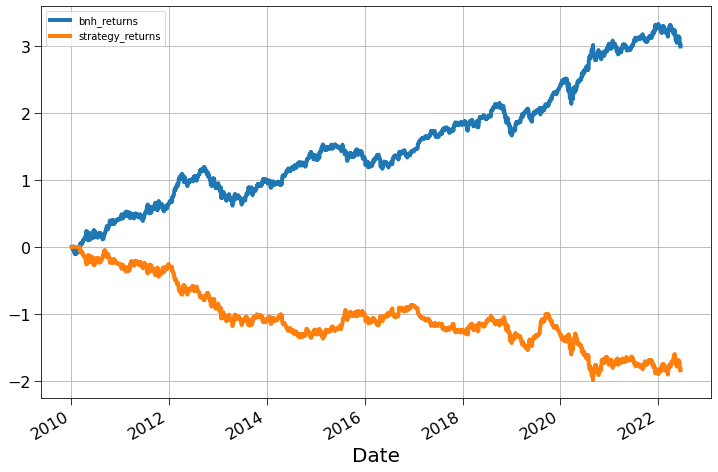

In [194]:
# Create signals and positions
# Comparing buy & hold strategy / bollinger bands strategy returns
print("Buy and hold returns:", stock_df['bnh_returns'].cumsum()[-1])
print("Strategy returns:", stock_df['strategy_returns'].cumsum()[-1])

# plotting strategy historical performance over time
stock_df[['bnh_returns', 'strategy_returns']] = stock_df[['bnh_returns', 'strategy_returns']].cumsum()
stock_df[['bnh_returns', 'strategy_returns']].plot(grid=True, figsize=(12,8))



Start date,2010-01-04
End date,2022-06-16
Total months,149
,Backtest
Annual return,-17.1%
Cumulative returns,-90.4%
Annual volatility,28.2%
Sharpe ratio,-0.52
Calmar ratio,-0.19
Stability,0.86
Max drawdown,-90.9%


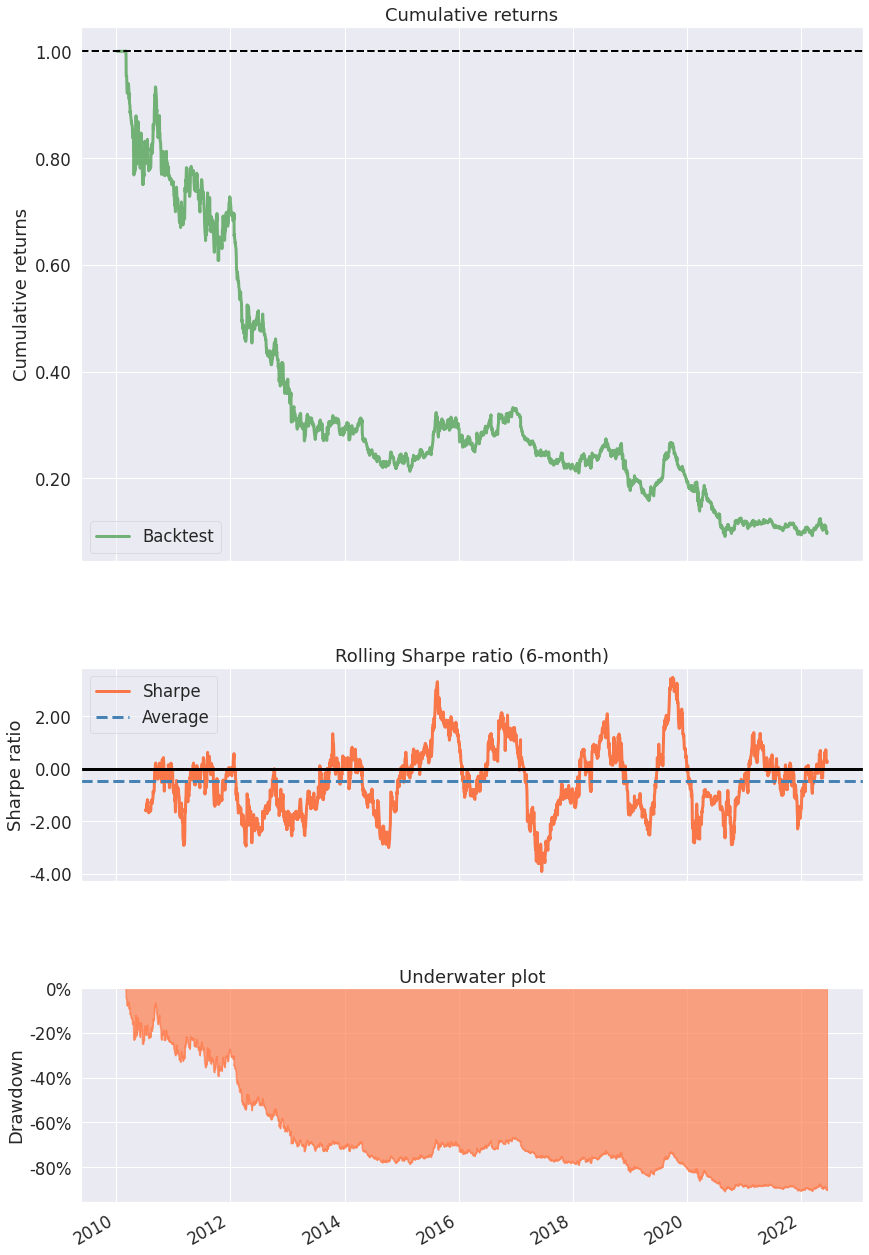

In [202]:
# Analyze results
pf.create_simple_tear_sheet(stock_df['strategy_returns'].diff())

In [218]:
# Testing Bollinger band trading strategy on range of assets including futures and equities

In [304]:
df = web.DataReader("CL=F", data_source="yahoo", start=start, end=end)

In [305]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,81.680000,79.629997,79.629997,81.510002,263542.0,81.510002
2010-01-05,82.000000,80.949997,81.629997,81.769997,258887.0,81.769997
2010-01-06,83.519997,80.849998,81.430000,83.180000,370059.0,83.180000
2010-01-07,83.360001,82.260002,83.199997,82.660004,246632.0,82.660004
2010-01-08,83.470001,81.800003,82.650002,82.750000,310377.0,82.750000
...,...,...,...,...,...,...
2022-06-13,122.250000,117.470001,120.190002,120.930000,372403.0,120.930000
2022-06-14,123.680000,116.620003,121.089996,118.930000,366320.0,118.930000
2022-06-15,119.610001,114.599998,119.070000,115.309998,301750.0,115.309998


In [306]:
# Calculating daily change in prices in percentages
df['performance'] = ((df['Adj Close'] - df['Adj Close'].shift(1)) / df['Adj Close'].shift(1))

In [307]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,performance
Date,,,,,,,
2010-01-04,81.680000,79.629997,79.629997,81.510002,263542.0,81.510002,NaN
2010-01-05,82.000000,80.949997,81.629997,81.769997,258887.0,81.769997,0.003190
2010-01-06,83.519997,80.849998,81.430000,83.180000,370059.0,83.180000,0.017244
2010-01-07,83.360001,82.260002,83.199997,82.660004,246632.0,82.660004,-0.006251
2010-01-08,83.470001,81.800003,82.650002,82.750000,310377.0,82.750000,0.001089


In [308]:
# Calculating a performance of Buy-and-Hold strategy
df['buy_and_hold_perf'] = (1 + df['performance']).cumprod()

In [309]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,performance,buy_and_hold_perf
Date,,,,,,,,
2022-06-13,122.250000,117.470001,120.190002,120.930000,372403.0,120.930000,0.002155,1.483622
2022-06-14,123.680000,116.620003,121.089996,118.930000,366320.0,118.930000,-0.016538,1.459085
2022-06-15,119.610001,114.599998,119.070000,115.309998,301750.0,115.309998,-0.030438,1.414673
2022-06-16,118.080002,112.309998,115.980003,117.589996,301750.0,117.589996,0.019773,1.442645
2022-06-17,118.970001,110.209999,117.080002,110.970001,39535.0,110.970001,-0.056297,1.361428


In [310]:
# Calculating the bollinger bands strategy
df['ma30'] = df['Adj Close'].rolling(30).mean()
df['std30'] = df['Adj Close'].rolling(30).std()
df['upper_band'] = df['ma30'] + (2 * df['std30'])
df['lower_band'] = df['ma30'] - (2 * df['std30'])
df['std/ma_%'] = (df['std30'] / df['ma30']) * 100

In [312]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,performance,buy_and_hold_perf,ma30,std30,upper_band,lower_band,std/ma_%
Date,,,,,,,,,,,,,
2022-06-13,122.250000,117.470001,120.190002,120.930000,372403.0,120.930000,0.002155,1.483622,112.286000,6.012702,124.311405,100.260595,5.354810
2022-06-14,123.680000,116.620003,121.089996,118.930000,366320.0,118.930000,-0.016538,1.459085,112.744667,5.975868,124.696404,100.792930,5.300356
2022-06-15,119.610001,114.599998,119.070000,115.309998,301750.0,115.309998,-0.030438,1.414673,113.174666,5.662483,124.499633,101.849700,5.003313
2022-06-16,118.080002,112.309998,115.980003,117.589996,301750.0,117.589996,0.019773,1.442645,113.500666,5.624377,124.749421,102.251912,4.955369
2022-06-17,118.970001,110.209999,117.080002,110.970001,39535.0,110.970001,-0.056297,1.361428,113.591000,5.558683,124.708366,102.473633,4.893595


In [332]:
# Creating Trading signals and making trades as a result of those signals

# Buy signal. If triggered set 1, else 0
df['trade_signals'] = np.where((df['Adj Close'] <= df['lower_band']) & (df['Adj Close'].shift(1) > df['lower_band']), 1, 0)

# Sell signal. If triggered set -1, else current value in the column cell
df['trade_signals'] = np.where((df['Adj Close'] >= df['upper_band']) & (df['Adj Close'].shift(1) < df['upper_band']), -1 , 0)

# Creating long and short positions
df['positions'] = df['trade_signals'].replace(to_replace=0, method='ffill')

# Shifting positions column by 1 to match performance returns, as the returns are previous day compared to current day change
df['positions'] = df['positions'].shift(1)

# Calculating the return of the strategy
df['strat_returns'] = df['performance'] * df['positions']


In [334]:
# Calculating the cumulative return of the strategy created
df['strat_perf'] = (1 + df['strat_returns']).cumprod()

Text(0, 0.5, 'Percentage(%) change')

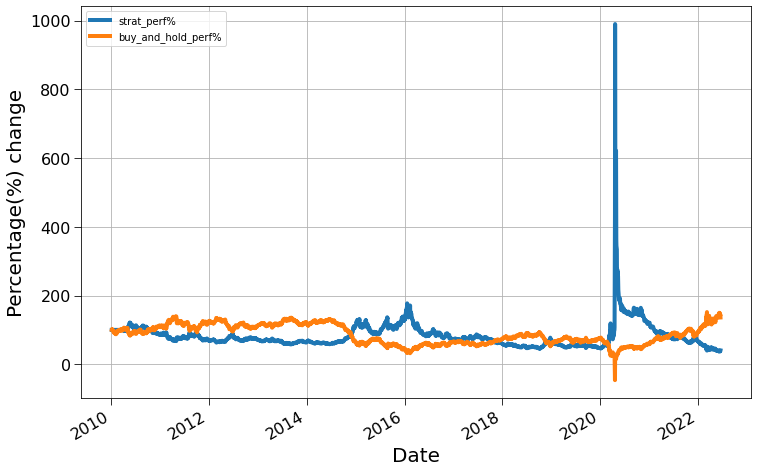

In [340]:
# Plotting the performance of both strategies
df[['strat_perf%', 'buy_and_hold_perf%']] = df[['strat_perf', "buy_and_hold_perf"]] * 100
df[['strat_perf%', 'buy_and_hold_perf%']].plot(grid=True, figsize=(12,8))
plt.ylabel("Percentage(%) change")

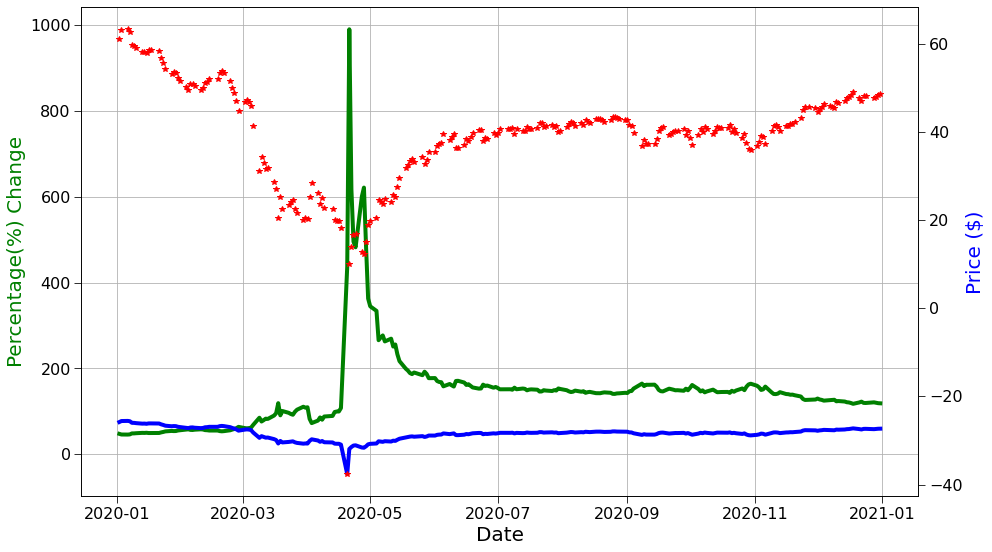

In [369]:
# Lets view in more detail the performance of the stratas in year 2020 to 2021
df_2020_21 = df.loc['2020':"2020", :]

fig, ax1 = plt.subplots(figsize=(15,9))

x = df_2020_21.index
y1 = df_2020_21[["strat_perf%"]]
y2 = df_2020_21[["buy_and_hold_perf%"]]
y3 = df_2020_21[['Adj Close']]

plt.grid(axis='both')

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax1.plot(x, y2, 'b-')
ax2.plot(x, y3, 'r*')


ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage(%) Change', color='g')
ax2.set_ylabel('Price ($)', color='b')


plt.show()

Start date,2010-01-04
End date,2022-06-17
Total months,149
,Backtest
Annual return,-7.5%
Cumulative returns,-62.1%
Annual volatility,123.7%
Sharpe ratio,0.00
Calmar ratio,-0.05
Stability,NaN
Max drawdown,-164.8%


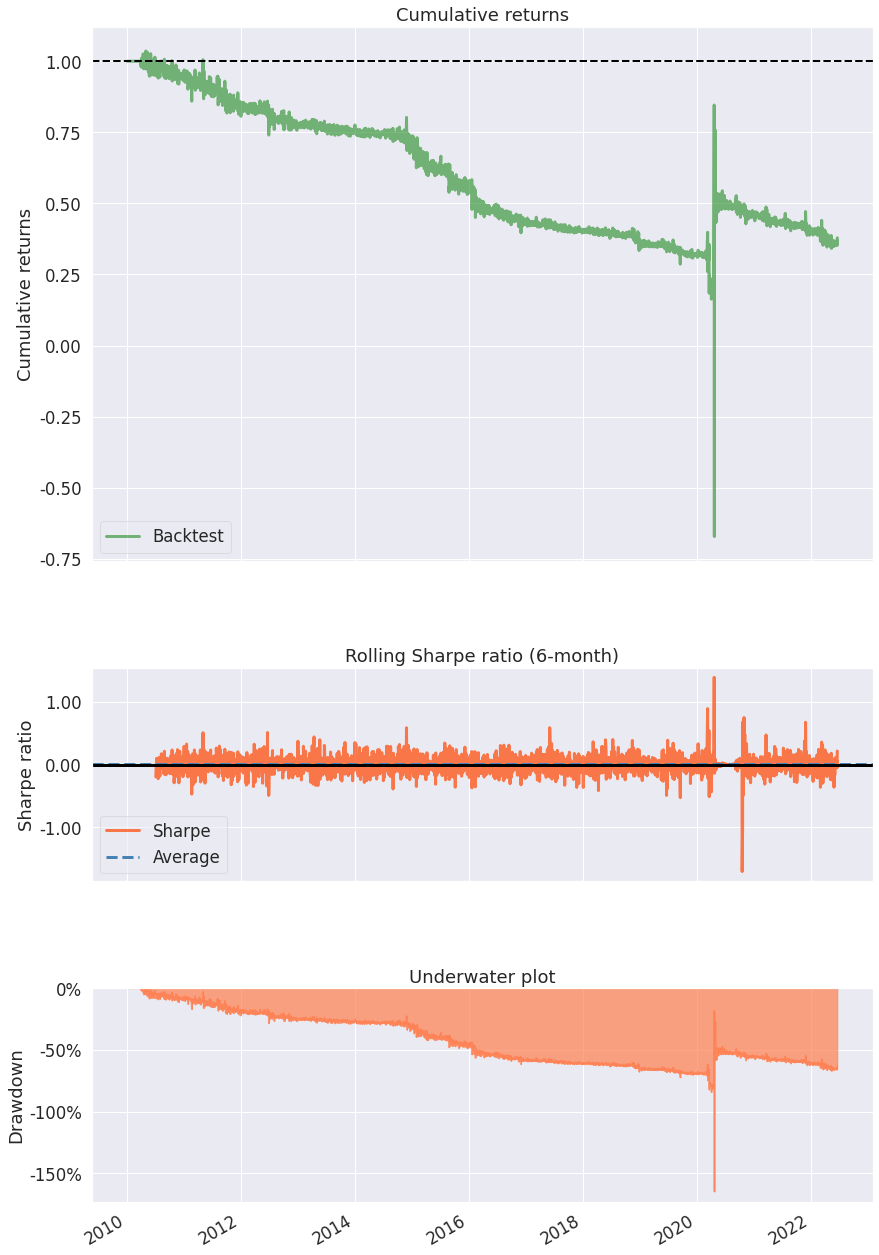

In [371]:
# Analyze results
pf.create_simple_tear_sheet(df['strat_returns'].diff())